In [36]:
#%matplotlib notebook
%matplotlib inline

In [147]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
import json 
import ctypes 
import tifffile 

from scipy import ndimage as nd
from scipy.ndimage import distance_transform_edt

import pypore3d 
from pypore3d import *
from pypore3d.p3dFiltPy import *
from pypore3d.p3dBlobPy import *
from pypore3d.p3dSkelPy import *
from pypore3d.p3dSITKPy import *


from glob import glob 
from tqdm import tqdm 

from poreUtils import *

In [2]:
data_dir = 'D:\\sagar\\Data\\MD_1264_A2_1_Z3.3mm\\result\\'
#data_dir = 'D:\\sagar\\Data\\MD_1264_A18\\'
# roi specification 
x, y, z = 300, 300, 300
res = 0.002 # 2 micron 

rois = glob(data_dir + '*.raw')

In [150]:
# reading only one roi 
for roi in tqdm(rois[0:1]):
    result = {}
    # Reading the file 
    volc = py_p3dReadRaw8(roi, x, y, z)
    # Appying Median filter for removing noise
    volc = py_p3dMedianFilter8(volc, x, y, z, width=3)
    # convert it to numpy array for manual thresholding and a bit processing which are easy in numpy array
    vol = swigObjt2uint8Array(volc, x, y, z)
    th_vol = vol < 55 
    th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
    # From binary to 0-255
    th_vol = norm8bit(th_vol, 0, 1)
    # Converting back to py_p3d data format to be able to use the functionality 
    th_vol.tofile('th_vol.raw')
    th_volc = py_p3dReadRaw8('th_vol.raw', x, y, z)
    #os.remove('th_vol.raw')
    
    # Basic Analysis
    basic_stats = py_p3dBasicAnalysis(th_volc, x, y, z, resolution=res)
    basic_anaysis = formatBasicStats(basic_stats, definition=True)
    result['basic_analysis'] = basic_anaysis
    
    
    # Anisotropy Analysis
    anisotropy_stats = py_p3dAnisotropyAnalysis(th_volc, x, y, z, resolution=res)
    anisotropy_analysis = formatAnisotropyStats(anisotropy_stats, definition=True)
    result['anisotropy_analysis'] = anisotropy_analysis
    
    # Blob Analysis 
    blob_stats, blob_im, star_im = py_p3dBlobAnalysis(th_volc, x, y, z, resolution=res)
    blob_analysis = formatBlobStats(blob_stats, definition=True)
    result['blob_analysis'] = blob_analysis

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.27s/it]


In [4]:
rois[0]

'D:\\sagar\\Data\\MD_1264_A2_1_Z3.3mm\\result\\1000-1300x1000-1300x2000-2300_8bit.raw'

In [5]:
blob_vol = swigObjt2uint8Array(blob_im, x, y, z)
star_vol = swigObjt2uint8Array(star_im, x, y, z)

In [6]:
# Center of mass of each blob 
centerOfMass = np.where(star_vol==1)
xcor = centerOfMass[2]
ycor = centerOfMass[1]
zcor = centerOfMass[0]

<IPython.core.display.Javascript object>


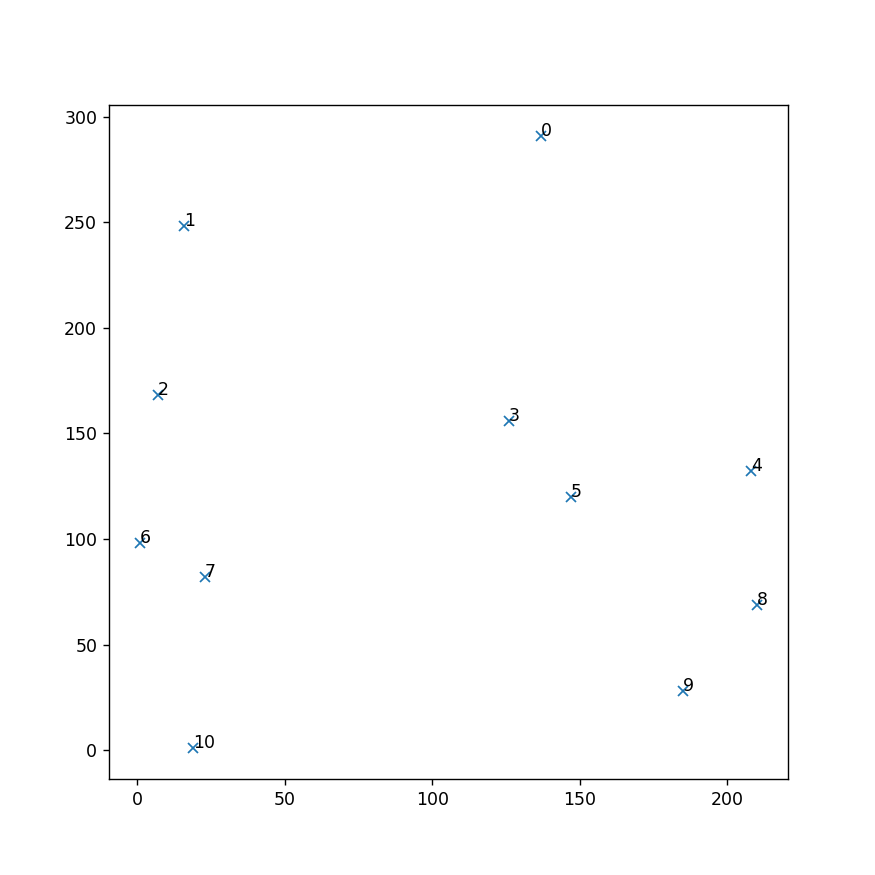

In [35]:
fig = plt.figure(figsize=(7,7))
plt.plot(xcor[0:11], 299-ycor[0:11], 'x')
for t in range(0,11):
    plt.text(xcor[t], 299-ycor[t], str(t))
plt.show()

In [152]:
th_roi = vol > 40
th_roi = nd.binary_closing(th_roi, np.ones((3,3,3)))
dis3d = distance_transform_edt(th_roi)
dis3d[dis3d < 4] = np.nan

<IPython.core.display.Javascript object>


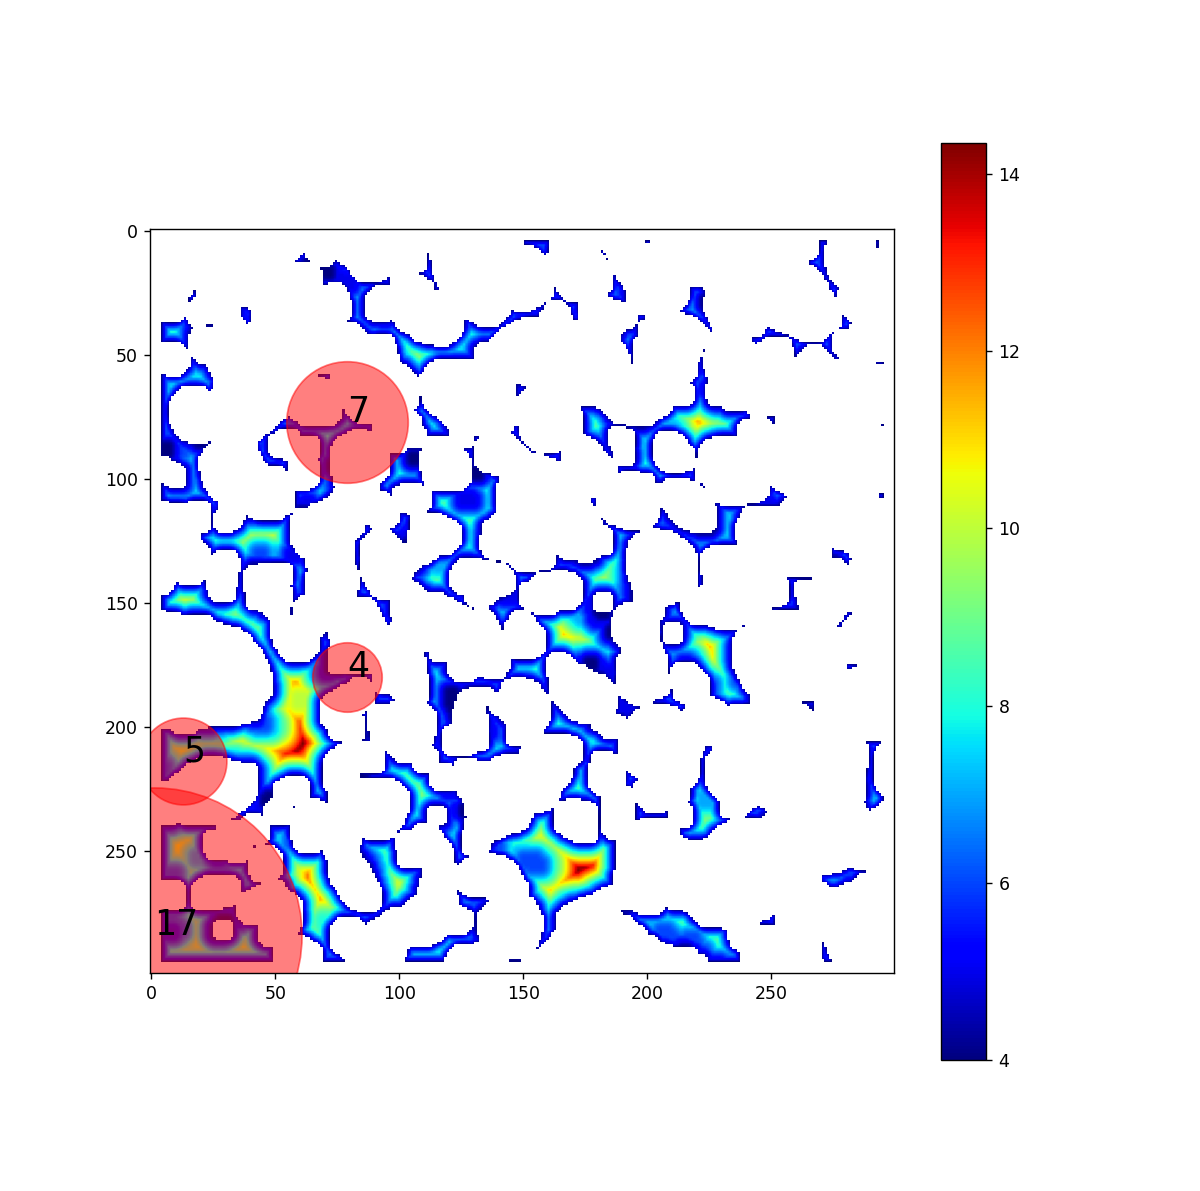

In [178]:
sliceNo = 25
fig = plt.figure(figsize=(10,10))
plt.imshow(dis3d[sliceNo, :, :], cmap=plt.cm.jet)

for c in range(0, len(zcor)):
    if zcor[c] == sliceNo:
        #print(xcor[c], ycor[c], sliceNo)
        #plt.plot(xcor[c], ycor[c], 'ok', markersize=2, alpha=1, )
        counter = 0
        for j in range(0,363):
            dist = np.sqrt(pow((xcor[j]-xcor[c]),2)+pow((ycor[j]-ycor[c]),2)+pow((zcor[j]-zcor[c]),2))
            if dist < 50:
                #ax.quiver(xcor[i], ycor[i], zcor[i], xcor[j]-xcor[i], ycor[j]-ycor[i], zcor[j]-zcor[i],)
                counter += 1
        #print(counter)        
        plt.plot(xcor[c], ycor[c], 'or', markersize=counter*10, alpha=0.5, )
        plt.text(xcor[c], ycor[c], str(counter), size=20)
        
plt.colorbar()
plt.show()

In [171]:
%matplotlib notebook

In [180]:
max(blob_analysis['result']['VOLUME'])

0.11728078400000001

In [24]:
minax.index(max(blob_analysis['result']['MIN_AXIS']))

0

In [181]:
blob_analysis['result']['VOLUME']

[0.11728078400000001,
 1.2000000000000002e-07,
 3.4160000000000004e-06,
 2.9672000000000003e-05,
 4e-08,
 1.576e-06,
 5.760000000000001e-07,
 2.672e-06,
 1.7920000000000002e-06,
 3.8400000000000005e-07,
 5.6000000000000005e-08,
 7.672e-06,
 9.600000000000001e-08,
 2.4528000000000003e-05,
 1.28e-07,
 1.6e-08,
 5.6000000000000005e-08,
 4.64e-07,
 2.8800000000000004e-07,
 1.1120000000000001e-06,
 1.6e-08,
 1.04e-07,
 2.96e-07,
 2.4000000000000003e-08,
 8e-09,
 6.4e-08,
 7.040000000000001e-07,
 4e-08,
 4.2400000000000004e-07,
 2.2400000000000002e-07,
 4.2400000000000004e-07,
 4.8000000000000006e-08,
 8e-08,
 1.36e-07,
 5e-06,
 2.96e-07,
 2.0000000000000002e-07,
 2.4000000000000003e-08,
 3.2e-08,
 2.4000000000000003e-08,
 8e-08,
 4e-08,
 3.5200000000000003e-07,
 3.2e-08,
 4.800000000000001e-07,
 6.4e-08,
 1.6960000000000002e-06,
 1.28e-06,
 3.2e-08,
 8e-09,
 6.4e-08,
 4.88e-07,
 3.2e-08,
 1.136e-06,
 6.000000000000001e-07,
 1.52e-07,
 3.92e-07,
 1.1200000000000001e-07,
 9.12e-07,
 9.6000000

In [29]:
import math
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

In [58]:
image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

image = rotate(image, angle=15, order=0)

rr, cc = ellipse(100, 100, 60, 50)
image[rr, cc] = 1

label_img = label(image)

In [32]:
image.shape

(600, 600)

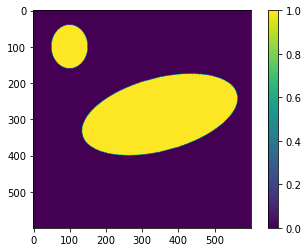

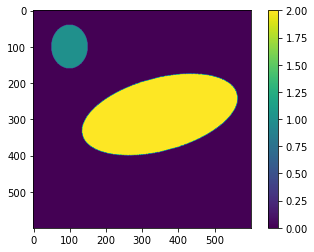

In [39]:
plt.imshow(image)
plt.colorbar()
plt.show()
plt.imshow(label_img)
plt.colorbar()
plt.show()

In [61]:
regions = regionprops(label_img)

In [57]:
regions[0]['area']

78481

In [62]:
regions[0]['area'] + regions[1]['area']

78481

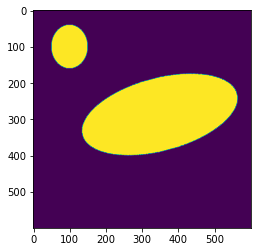

In [54]:
plt.imshow(img)

In [80]:
img3d = image.reshape(100,100,36)

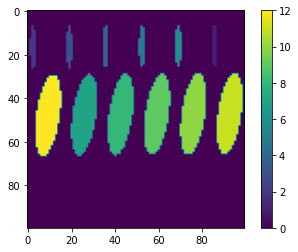

In [84]:
plt.imshow(label_img3d[:, :, 18])
plt.colorbar()
plt.show()

In [85]:
label_img3d.dtype

dtype('int64')

In [86]:
region3d = regionprops(label_img3d)

In [88]:
region3d[0]['area']

1566

In [98]:
for r in region3d:
    print(r.label)

1
2
3
4
5
6
7
8
9
10
11
12


In [140]:
label_th_vol = label(th_vol, connectivity=1)

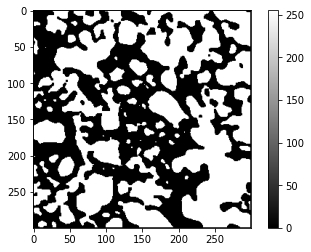

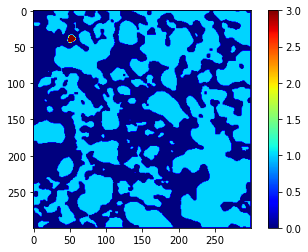

In [145]:
plt.imshow(th_vol[2, :, :], cmap=plt.cm.gray)
plt.colorbar()
plt.show()
plt.imshow(label_th_vol[3, :, :], cmap=plt.cm.jet)
plt.colorbar()

In [105]:
reg_th_vol = regionprops(label_th_vol)

In [108]:
for r in reg_th_vol:
    print(r.area * 2e-6)

29.326055999999998
2.9999999999999997e-05
0.0008539999999999999
0.007417999999999999
9.999999999999999e-06
0.000144
0.000668
0.000448
9.6e-05
1.4e-05
0.001918
2.4e-05
0.006131999999999999
3.2e-05
4e-06
1.4e-05
0.000116
7.2e-05
0.000278
2.6e-05
7.4e-05
6e-06
2e-06
1.6e-05
0.000176
9.999999999999999e-06
0.000106
5.6e-05
0.000106
1.2e-05
1.9999999999999998e-05
3.4e-05
0.00125
7.4e-05
4.9999999999999996e-05
6e-06
6e-06
1.9999999999999998e-05
9.999999999999999e-06
8.8e-05
8e-06
0.00011999999999999999
1.6e-05
0.000424
0.00031999999999999997
8e-06
2e-06
1.6e-05
0.000122
8e-06
0.00028399999999999996
0.00015
3.7999999999999995e-05
9.8e-05
2.8e-05
0.00022799999999999999
2.4e-05
0.000198
0.000348
2.6e-05
2.2e-05
8e-06
2e-06
3.2e-05
4e-06
6.599999999999999e-05
4e-06
1.6e-05
4e-06
1.4e-05
0.0005
0.006932
2.6e-05
3.2e-05
0.000484
1.4e-05
4.9999999999999996e-05
0.003958
0.000848
0.000116
8e-06
5.9999999999999995e-05
0.00013199999999999998
1.4e-05
0.000314
8.8e-05
2e-06
5.9999999999999995e-05
0.000128

In [144]:
label_th_vol[label_th_vol>3] = 0

In [149]:
vol

[0.11728078400000001,
 1.2000000000000002e-07,
 3.4160000000000004e-06,
 2.9672000000000003e-05,
 4e-08,
 1.576e-06,
 5.760000000000001e-07,
 2.672e-06,
 1.7920000000000002e-06,
 3.8400000000000005e-07,
 5.6000000000000005e-08,
 7.672e-06,
 9.600000000000001e-08,
 2.4528000000000003e-05,
 1.28e-07,
 1.6e-08,
 5.6000000000000005e-08,
 4.64e-07,
 2.8800000000000004e-07,
 1.1120000000000001e-06,
 1.6e-08,
 1.04e-07,
 2.96e-07,
 2.4000000000000003e-08,
 8e-09,
 6.4e-08,
 7.040000000000001e-07,
 4e-08,
 4.2400000000000004e-07,
 2.2400000000000002e-07,
 4.2400000000000004e-07,
 4.8000000000000006e-08,
 8e-08,
 1.36e-07,
 5e-06,
 2.96e-07,
 2.0000000000000002e-07,
 2.4000000000000003e-08,
 3.2e-08,
 2.4000000000000003e-08,
 8e-08,
 4e-08,
 3.5200000000000003e-07,
 3.2e-08,
 4.800000000000001e-07,
 6.4e-08,
 1.6960000000000002e-06,
 1.28e-06,
 3.2e-08,
 8e-09,
 6.4e-08,
 4.88e-07,
 3.2e-08,
 1.136e-06,
 6.000000000000001e-07,
 1.52e-07,
 3.92e-07,
 1.1200000000000001e-07,
 9.12e-07,
 9.6000000